02/06/2025 
Yifu Chen 
research project

Day 1
scan paper
install packages
try some examples


#paper: PyRTlib...

0 Abstract 
    some n. never head

1 Introduction 
    What is Radiative transfer (RT) why important
    microwave (MW)
    !I skip intro other program!
    program for other plant?
        may some assumption for easier modeling?
    !I skip intro why PyRTlib!

2 Radiative transfer model
    Eq 1.
    definition of brightness temperature?
    Eq 2.
    TOA: the top of the atmosphere
    Eq 3.
    math to Eq 8.
2.1 Modeling atmospheric absorption
    "PyRTlib is not adequate for modeling extinction by rain or large cloud droplets or ice particles"
    "three models for liquid cloud abs. available ... alternatively selected by the user"
2.2 Modeling a continuous atmosphere
    currently limit mode offer
2.3 Modeling observation geometry
    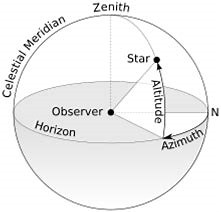
        ?Limb. The portion of a planetary (or stellar) atmosphere at the outer boundary of the disk, viewed “edge on.” Limb sounding. Atmospheric remote sounding technique involving observing radiation emitted or scattered from the limb.?
        "PyRTlib optionally provides a slightly modified definition for computing the dry and wet refractivity terms"

3 Tools for retrieving input data
3.1 Radiosondes
    ?what is Radiosondes?
    Common for weather data
    understand the atmosphere infront you
    not length but use presure 
    value for modeling breify modeling

    I skip how PyRTlib get data
3.2 Model reanalysis
    ?4D data is sapce&time?
    skip

4 Examples of applications
    Table 2: Output variables from PyRTlib
    Table 3: List of all the intermediate variables accessible from PyRTlib.
4.1 Simulation of downwelling T_B
    example 1
        Listing4 & Fig. 4
4.2 Simulation of upwelling T_B
    example 2
        Listing 5 & Fig. 5
4.3 Simulation of simultaneous downwelling and upwelling T_B
    example 3
        Fig 6
4.4 Comparison of absorption models
    example 4
        Fig 7
        Fig 8&9
4.5 Absorption model uncertainty
    example 5
        Fig 10&11
4.6 Radiative forcing versus water vapor concentration
    example 6
        Fig 12

5 Summary and future developments

A Code and data availability
...
    


#code
install
   $ pip install pyrtlib

test run

? Tb =?= guess1: brightness Tempture 
         guess2: "TBUPDN. The upward–downward TB (TBUPDN)"?

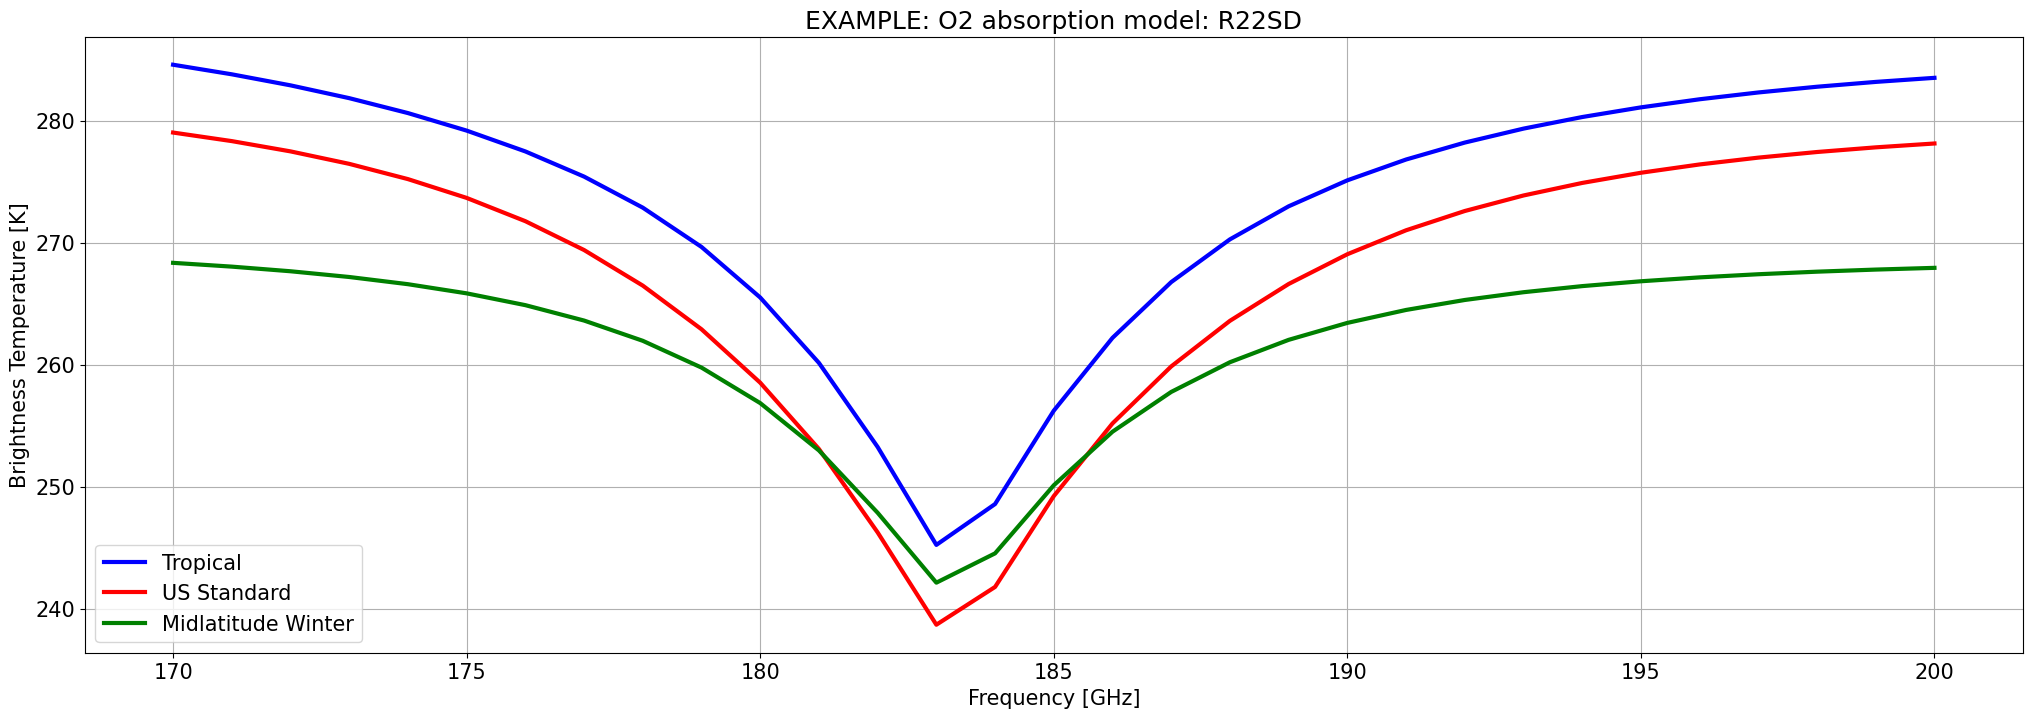

In [7]:
"""
--------example run------------
"""
# This requires jupyter-matplotlib a.k.a. ipympl.
# ipympl can be install via pip or conda.

%matplotlib inline 
#?
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})
import numpy as np

from pyrtlib.absorption_model import O2AbsModel
from pyrtlib.climatology import AtmosphericProfiles as atmp
from pyrtlib.tb_spectrum import TbCloudRTE
from pyrtlib.utils import ppmv2gkg, mr2rh

zTro, pTro, _Tro, tTro, mdTro = atmp.gl_atm(atmp.TROPICAL)
zUSS, pUSS, _USS, tUSS, mdUSS = atmp.gl_atm(atmp.US_STANDARD)
zMW, pMW, _MW, tMW, mdMW = atmp.gl_atm(atmp.MIDLATITUDE_WINTER)

gkgTro = ppmv2gkg(mdTro[:, atmp.H2O], atmp.H2O)
gkgUSS = ppmv2gkg(mdUSS[:, atmp.H2O], atmp.H2O)
gkgMW = ppmv2gkg(mdMW[:, atmp.H2O], atmp.H2O)

rhTro = mr2rh(pTro, tTro, gkgTro)[0] / 100
rhUSS = mr2rh(pUSS, tUSS, gkgUSS)[0] / 100
rhMW = mr2rh(pMW, tMW, gkgMW)[0] / 100

frq = np.arange(170, 201, 1)

rteTro = TbCloudRTE(zTro, pTro, tTro, rhTro, frq)
rteUSS = TbCloudRTE(zUSS, pUSS, tUSS, rhUSS, frq)
rteMW = TbCloudRTE(zMW, pMW, tMW, rhMW, frq)

rteTro.init_absmdl('R22SD')
rteUSS.init_absmdl('R22SD')
rteMW.init_absmdl('R22SD')

#no idea what it's
O2AbsModel.model = 'R22'
O2AbsModel.set_ll()
# what is linelist

dfTro = rteTro.execute()
dfUSS = rteUSS.execute()
dfMW = rteMW.execute()

dfTro = dfTro.set_index(frq)
dfUSS = dfUSS.set_index(frq)
dfMW = dfMW.set_index(frq)

dfTro.tbtotal.plot(figsize=(25, 8), linewidth=3,
                 xlabel="Frequency [GHz]", ylabel="Brightness Temperature [K]",
                 grid=True, color='blue', label='Tropical')

dfUSS.tbtotal.plot(figsize=(25, 8), linewidth=3,
                 xlabel="Frequency [GHz]", ylabel="Brightness Temperature [K]",
                 grid=True, color='red', label='US Standard' )

dfMW.tbtotal.plot(figsize=(25, 8), linewidth=3,
                 xlabel="Frequency [GHz]", ylabel="Brightness Temperature [K]", 
                 grid=True, color='green', label='Midlatitude Winter') 

plt.legend()
plt.title('EXAMPLE: O2 absorption model: R22SD')


plt.show()

